In [8]:
# data processing packages
import numpy as np   
import pandas as pd 
from pandas import *
from numpy import *

from scipy import stats # look at scipy
from scipy import linalg
from scipy import *
 
%matplotlib inline    
import matplotlib as mplt
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import IPython
from IPython.display import display

import matplotlib
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
# matplotlib.style.use('ggplot')
import itertools

import pickle
import seaborn as sns

# local packages 
# from utils_causal import *
# from utils_results_analysis import *

In [16]:
def plot_epoch_variable(file, legend_label):
    
    pkl_file = open(file, 'rb')
    data = pickle.load(pkl_file)

    att = []
    for i in data:
        att.append(i[1])
    
    fig, ax = plt.subplots( ncols =  2 , figsize=(22,6));
    
    for i in range(len(att[0])):
        tmpdata = [ j[i] for j in att ]
        ax[0].plot(tmpdata, label = legend_label[i] );
#         ax[0].set_ylim([0,0.25])
    
    ax[0].legend()
    
    
    att = []
    for i in data:
        att.append(i[2])
    
    for i in range(len(att[0])):
        tmpdata = [ j[i] for j in att ]
        ax[1].plot(tmpdata, label = legend_label[i] );
#         ax[1].set_ylim([0,0.25])
    
    ax[1].legend()

def plot_epoch_variable_temporal(file, epoch_id):
    
    pkl_file = open(file, 'rb')
    data = pickle.load(pkl_file)
    
    epoch_var_att = []
    for i in data:
        epoch_var_att.append(i[0])
    
    print(np.shape(epoch_var_att))

    fig, ax = plt.subplots();
    ax_sns = sns.heatmap(epoch_var_att[epoch_id], linewidth=0.5)
    ax_sns.set_yticklabels(full_cols, rotation = 360)
    plt.show()
    
def sort_variable(file, label):
    
    pkl_file = open(file, 'rb')
    data = pickle.load(pkl_file)
    
    att = []
    for i in data:
        att.append(i[2])
    
    label_val = [[label[idx], val] for idx, val in enumerate(att[-1])]
    
    return sorted(label_val, key = lambda x:x[1])


In [4]:
# ---- SML dataset ----

full_cols = ['Temp. dinning',
          'Forecast temp.', 
          'CO2 dinning', 
          'CO2 room', 
          'Humid. dinning', 
          'Humid. room', 
          'Lighting dinning', 
          'Lighting room', 
          'Sun dusk',
          'Wind', 
          'Sunlight in west', 
          'Sunlight in east', 
          'Sunlight in south', 
          'Sun irradiance', 
          'Outdoor temp.',
          'Outdoor humidity',
          'Temp. room']

[['Outdoor temp.', 0.008625614], ['Outdoor humidity', 0.012170783], ['Sun irradiance', 0.013029047], ['CO2 dinning', 0.015664699], ['Sunlight in south', 0.01571146], ['Sun dusk', 0.015792266], ['Wind', 0.015927516], ['Forecast temp.', 0.016015744], ['Sunlight in west', 0.016098708], ['Lighting dinning', 0.016379507], ['Humid. dinning', 0.016443782], ['Sunlight in east', 0.016480787], ['Temp. room', 0.016568797], ['Temp. dinning', 0.01667047], ['Lighting room', 0.18530214], ['CO2 room', 0.26027787], ['Humid. room', 0.3428408]]


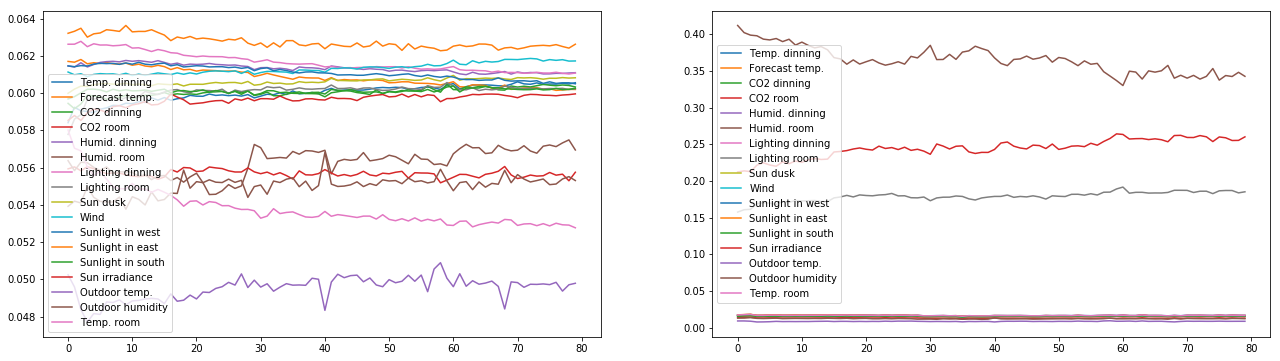

In [10]:
# MV-LSTM 
# gate type: full

# variable importacne ranking
print(sort_variable("../../ts_results/sml/ke_sml_01.00.1_.p", full_cols))

# epoch-wise variable importance
plot_epoch_variable("../../ts_results/sml/ke_sml_01.00.1_.p", full_cols)

# epoch-wise variable temporal importance

plot_epoch_variable_temporal("../../ts_results/sml/ke_sml_01.00.0001_.p", 0)

plot_epoch_variable_temporal("../../ts_results/sml/ke_sml_01.00.0001_.p", 79)



 [['Wind', 0.00044888564], ['Temp. dinning', 0.00044969073], ['Sun irradiance', 0.00045217885], ['Sunlight in south', 0.00045399988], ['Outdoor temp.', 0.00045455518], ['Sunlight in east', 0.00045472028], ['Sunlight in west', 0.00045850233], ['Lighting room', 0.0004633749], ['CO2 room', 0.00046493148], ['CO2 dinning', 0.0004661648], ['Forecast temp.', 0.0004711329], ['Outdoor humidity', 0.00056442776], ['Temp. room', 0.001042164], ['Sun dusk', 0.023730522], ['Lighting dinning', 0.097435124], ['Humid. room', 0.41923773], ['Humid. dinning', 0.45295188]]

 [['Wind', 0.00052974693], ['Temp. dinning', 0.0005313904], ['Sun irradiance', 0.00053585245], ['Sunlight in south', 0.00053668156], ['Sunlight in east', 0.00053683226], ['Outdoor temp.', 0.0005425172], ['Sunlight in west', 0.00054454163], ['Lighting room', 0.0005490114], ['CO2 room', 0.00055103103], ['CO2 dinning', 0.00055302226], ['Forecast temp.', 0.0005630277], ['Outdoor humidity', 0.0010019997], ['Temp. room', 0.0010279531], ['Sun 

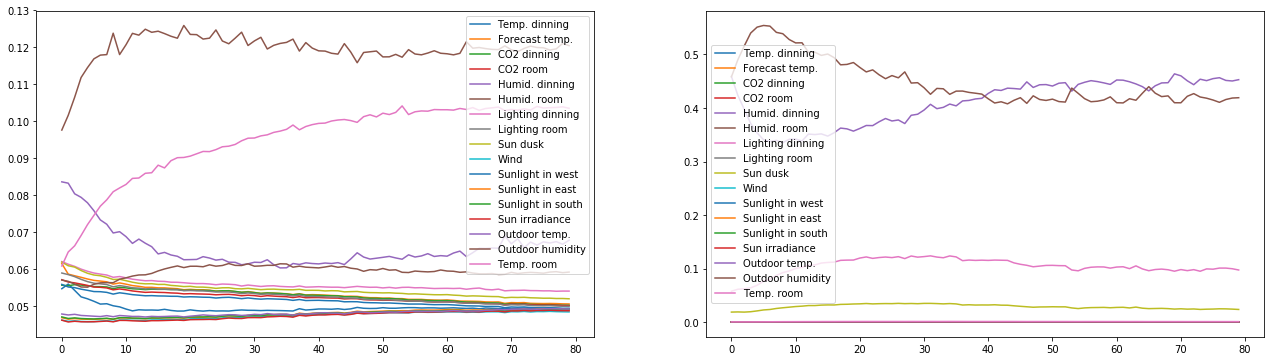

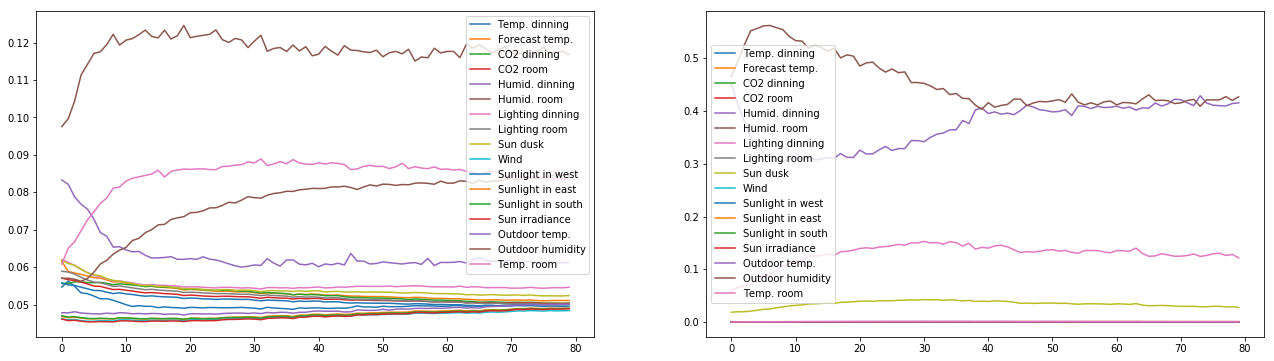

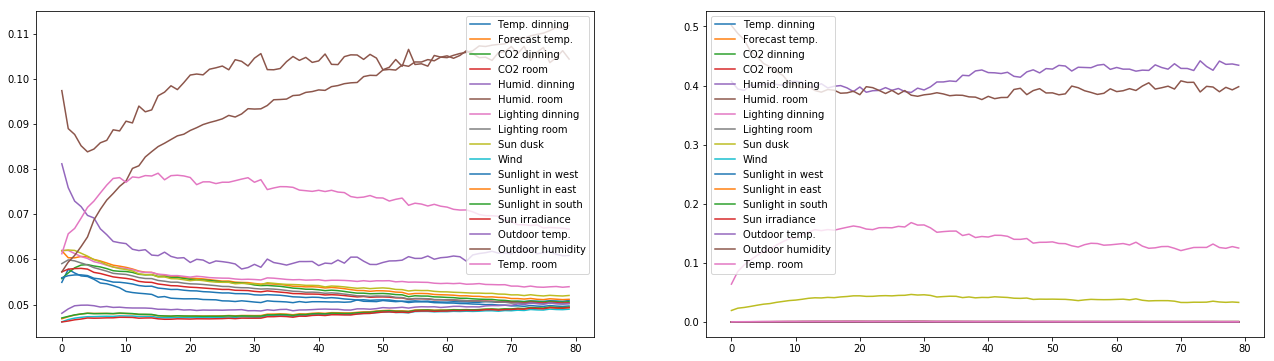

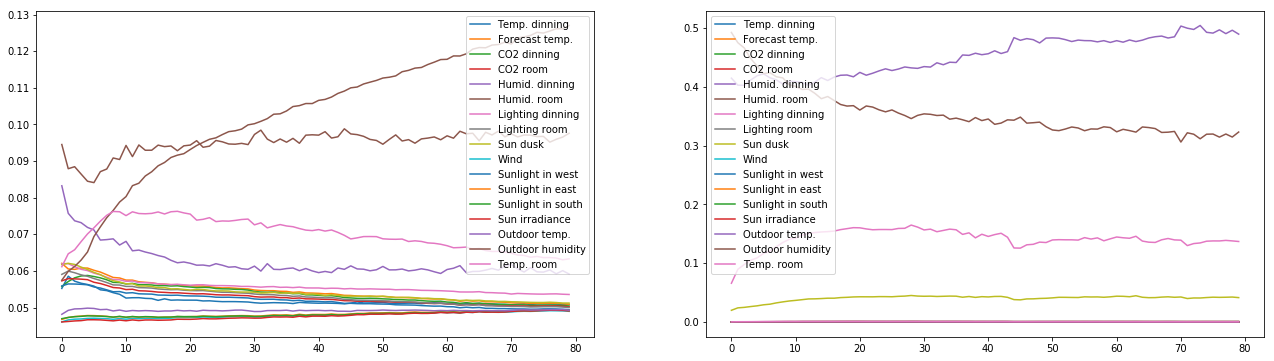

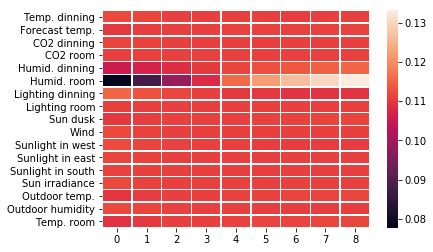

(80, 17, 9)


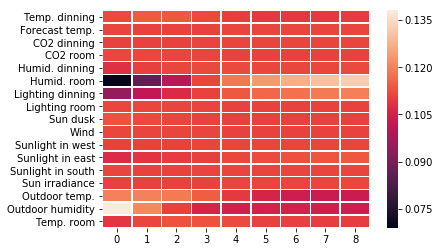

In [26]:
# MV-LSTM 
# gate type: tensor


# variable importacne ranking
print('\n', sort_variable("../../ts_results/sml/ke_sml_01.00.0001_.p", full_cols))
print('\n', sort_variable("../../ts_results/sml/ke_sml_01.00.001_.p", full_cols))
print('\n', sort_variable("../../ts_results/sml/ke_sml_01.00.01_.p", full_cols))
print('\n', sort_variable("../../ts_results/sml/ke_sml_01.00.1_.p", full_cols))

# epoch-wise variable importance
plot_epoch_variable("../../ts_results/sml/ke_sml_01.00.0001_.p", full_cols)

plot_epoch_variable("../../ts_results/sml/ke_sml_01.00.001_.p", full_cols)

plot_epoch_variable("../../ts_results/sml/ke_sml_01.00.01_.p", full_cols)

plot_epoch_variable("../../ts_results/sml/ke_sml_01.00.1_.p", full_cols)


# # epoch-wise variable temporal importance

plot_epoch_variable_temporal("../../ts_results/sml/ke_sml_01.00.0001_.p", 0)

plot_epoch_variable_temporal("../../ts_results/sml/ke_sml_01.00.0001_.p", 79)

# plot_epoch_variable_temporal("../../ts_results/sml/ke_sml_01.00.001_.p", 0)

# plot_epoch_variable_temporal("../../ts_results/sml/ke_sml_01.00.001_.p", 79)

# plot_epoch_variable_temporal("../../ts_results/sml/ke_sml_01.00.01_.p", 0)

# plot_epoch_variable_temporal("../../ts_results/sml/ke_sml_01.00.01_.p", 79)

# plot_epoch_variable_temporal("../../ts_results/sml/ke_sml_01.00.1_.p", 0)

# plot_epoch_variable_temporal("../../ts_results/sml/ke_sml_01.00.1_.p", 79)

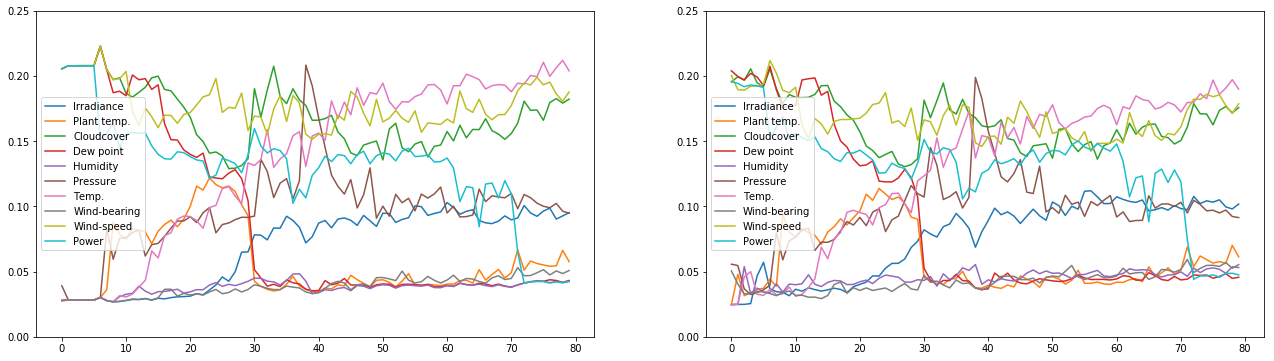

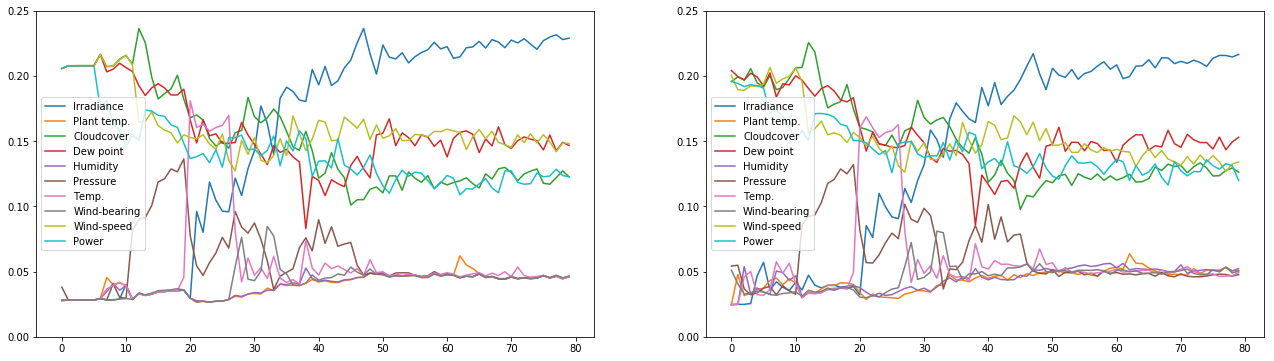

In [157]:
# ---- PLANT dataset ----

full_cols = ['Irradiance', 'Plant temp.', 'Cloudcover', 'Dew point', 'Humidity', 'Pressure',\
                'Temp.', 'Wind-bearing', 'Wind-speed', 'Power']


plot_epoch_import("../../ts_results/plant/ke_plant_01.00.0001_.p", full_cols)

plot_epoch_import("../../ts_results/plant/ke_plant_01.00.001_.p", full_cols)


---- Plant

In [24]:
# PLANT : MV-LSTM attention

# ganger causal: # [0, 1, 2, 4]
# 'plant-temp.', 'cloudcover', 'dewpoint', temperature'

num_vari = 8

vari_name = ['Plant-temp.', 'Cloud cover', 'Dew point', 'Humidity', 'Temperature', 'Wind bearing', \
             'Wind speed', 'Autoregressive']

# --- load data
# "../../ts_results/plant/plant_0.50.001_17.dat", 18, 19
# plant_00.50.0001_48.dat

py_ts = np.load("../../ts_results/plant/plant_00.50.0001_48.dat")
print np.shape(py_ts)

# attention, individual prediction
cols_att = [str(i) for i in range(num_vari)]
cols_pred = ['pre' + str(i) for i in range(num_vari)]
cols = ['truth', 'pred'] + [str(i) for i in range(num_vari)] + ['pre' + str(i) for i in range(num_vari)]

py_df = pd.DataFrame( py_ts, columns = cols)
print py_df.shape, py_df.columns


# ----

indi_prior = prior(py_df, num_vari, vari_name)

indi_poster = individual_posterior(py_df, num_vari, vari_name)

aggre_prior = aggregate_prior(py_df, num_vari, vari_name)

aggregate_poster(indi_poster, num_vari, vari_name)

posterior(py_df, num_vari, vari_name, aggre_prior)    

(662, 18)
(662, 18) Index([u'truth', u'pred', u'0', u'1', u'2', u'3', u'4', u'5', u'6', u'7',
       u'pre0', u'pre1', u'pre2', u'pre3', u'pre4', u'pre5', u'pre6', u'pre7'],
      dtype='object')

 --- individual prior mean and variance:
[('Wind bearing', 0.04796707460774936), ('Plant-temp.', 0.04918889665914266), ('Dew point', 0.06834015918451043), ('Humidity', 0.07583444565815958), ('Temperature', 0.1257108442339022), ('Wind speed', 0.16043289377722675), ('Cloud cover', 0.19043465118765202), ('Autoregressive', 0.2820910333889309)]

 --- individual_posterior mean and variance :
[('Plant-temp.', 0.04771250085669403), ('Wind bearing', 0.0512143814316873), ('Dew point', 0.05771299301276701), ('Humidity', 0.06404664019063797), ('Temperature', 0.09391935569056606), ('Wind speed', 0.12134577992758137), ('Cloud cover', 0.26067175720784114), ('Autoregressive', 0.3033765916822251)]

 --- aggregated prior :
[('Wind bearing', 0.04796707394565917), ('Plant-temp.', 0.04918889598018764), ('Dew poin

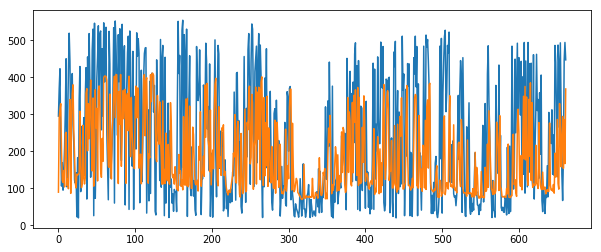

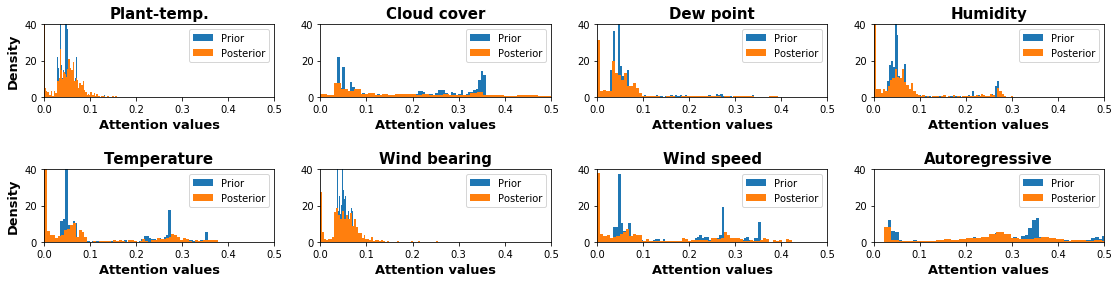

In [26]:
# PLANT : MV-LSTM attention PLOT

fig, ax = plt.subplots(figsize=(10,4))
y = py_df['truth']
py = py_df['pred']
ax.plot(range(len(y)), y)
ax.plot(range(len(y)), py)


fig, ax = plt.subplots(2, 4, figsize=(19,4))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=1.0)
num_bins = 60

for i in range(num_vari):
    
    tmp_set = [j[i] for j in indi_prior]    
    
    ax[i/4][i%4].hist(tmp_set, num_bins, density = True, label = 'Prior')
    ax[i/4][i%4].set_xlim(0, 0.6)
    ax[i/4][i%4].set_ylim(0, 40)
    ax[i/4][i%4].set_title( vari_name[i], fontweight = 'bold', fontsize=15)
    
    tmp_set = [j[i] for j in indi_poster]  
    
    ax[i/4][i%4].hist(tmp_set, num_bins, density = True, label = 'Posterior')
    ax[i/4][i%4].set_xlim(0, 0.5)
    ax[i/4][i%4].set_ylim(0, 40)
    ax[i/4][i%4].set_title( vari_name[i], fontweight = 'bold', fontsize=15)
    
    ax[i/4][i%4].legend(fontsize=10)
    
    
    ax[i/4][i%4].set_xlabel('Attention values', fontweight = 'bold', fontsize = 13)
    if i%4 == 0:
        ax[i/4][i%4].set_ylabel('Density', fontweight = 'bold', fontsize = 13)
    
fig.savefig('../../ts_results/figure/plant_mv_poster.eps', bbox_inches='tight')


(662, 7) Index([u'0', u'1', u'2', u'3', u'4', u'5', u'6'], dtype='object')

 --- individual prior mean and variance:
[('Dew point', 0.08185731), ('Plant-temp.', 0.08906612), ('Wind bearing', 0.09223573), ('Temperature', 0.13807148), ('Wind speed', 0.15129167), ('Cloud cover', 0.15700361), ('Humidity', 0.2904741)]

 --- aggregated prior :
[('Dew point', 0.0818573062830684), ('Plant-temp.', 0.08906611546895614), ('Wind bearing', 0.09223573007527382), ('Temperature', 0.13807148148187162), ('Wind speed', 0.15129166849474202), ('Cloud cover', 0.15700359118604815), ('Humidity', 0.29047409190429996)]


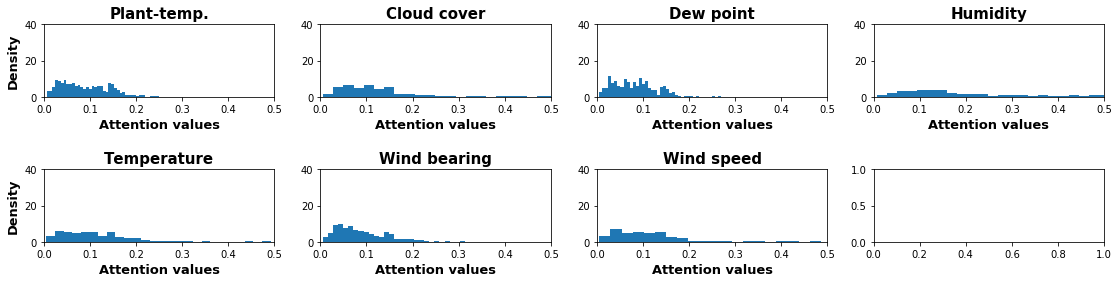

In [27]:
# Plant Dual
num_vari = 7

# -- Data -- 
pkl_file = "../../ts_results/pickle/new_plant_dual.pickle"
pkl_file = open(pkl_file, 'rb')
data = pickle.load(pkl_file)

att = data['attention']
rmse = data['rmse']

# attention
cols_att = [str(i) for i in range(num_vari)]
py_df = pd.DataFrame( att, columns = cols_att)
print py_df.shape, py_df.columns

indi_prior = prior(py_df, num_vari, vari_name)
aggre_prior = aggregate_prior(py_df, num_vari, vari_name)


# PLOT

fig_row = 2
fig_col = 4
fig, ax = plt.subplots(fig_row, fig_col, figsize=(19,4))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace = 1.0)
num_bins = 40

for i in range(num_vari):
    
    tmp_set = [j[i] for j in indi_prior]    
    
    ax[i/fig_col][i%fig_col].hist(tmp_set, num_bins, density = True)
    ax[i/fig_col][i%fig_col].set_xlim(0, 0.5)
    ax[i/fig_col][i%fig_col].set_ylim(0, 40)
    ax[i/fig_col][i%fig_col].set_title( vari_name[i], fontweight = 'bold', fontsize=15)
    
    ax[i/fig_col][i%fig_col].set_xlabel('Attention values', fontweight = 'bold', fontsize = 13)
    if i%fig_col == 0:
        ax[i/fig_col][i%fig_col].set_ylabel('Density', fontweight = 'bold', fontsize = 13)

        
fig.savefig('../../ts_results/figure/plant_dual_prior.eps', bbox_inches='tight')

(662, 8) Index([u'0', u'1', u'2', u'3', u'4', u'5', u'6', u'7'], dtype='object')

 --- individual prior mean and variance:
[('Humidity', -0.03475579), ('Cloud cover', -0.019178892), ('Wind bearing', -0.005320123), ('Temperature', 0.010206173), ('Dew point', 0.014488635), ('Wind speed', 0.015767884), ('Plant-temp.', 0.028534098), ('Autoregressive', 0.03171699)]

 --- aggregated prior :
[('Humidity', -0.8383171459751304), ('Cloud cover', -0.46259903715115724), ('Wind bearing', -0.12832253055231307), ('Temperature', 0.24617512125944727), ('Dew point', 0.3494690437354264), ('Wind speed', 0.3803247945209402), ('Plant-temp.', 0.6882486436323978), ('Autoregressive', 0.7650207461766473)]


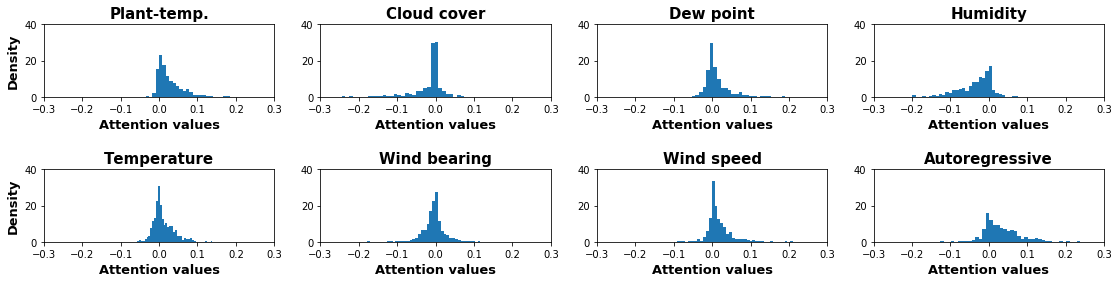

In [28]:
# Plant RETAIN
num_vari = 8

# -- Data -- 
pkl_file = "../../ts_results/pickle/new_plant_retain.pickle"
pkl_file = open(pkl_file, 'rb')
data = pickle.load(pkl_file)

att = data['attention']
rmse = data['rmse']

# attention
cols_att = [str(i) for i in range(num_vari)]
py_df = pd.DataFrame( att, columns = cols_att)
print py_df.shape, py_df.columns

indi_prior = prior(py_df, num_vari, vari_name)
aggre_prior = aggregate_prior(py_df, num_vari, vari_name)

# PLOT

fig_row = 2
fig_col = 4
fig, ax = plt.subplots(fig_row, fig_col, figsize=(19,4))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace= 1.0)
num_bins = 40

for i in range(num_vari):
    
    tmp_set = [j[i] for j in indi_prior]    
    
    ax[i/fig_col][i%fig_col].hist(tmp_set, num_bins, density = True)
    ax[i/fig_col][i%fig_col].set_xlim(-0.3, 0.3)
    ax[i/fig_col][i%fig_col].set_ylim(0, 40)
    ax[i/fig_col][i%fig_col].set_title( vari_name[i], fontweight = 'bold', fontsize=15)
    
    ax[i/fig_col][i%fig_col].set_xlabel('Attention values', fontweight = 'bold', fontsize = 13)
    if i%fig_col == 0:
        ax[i/fig_col][i%fig_col].set_ylabel('Density', fontweight = 'bold', fontsize = 13)
    
    
fig.savefig('../../ts_results/figure/plant_retain_prior.eps', bbox_inches='tight')

In [23]:
# Plant CLSTM

num_vari = 8
att = [0.8353186,0.79029024,0.9444508,0.91853106,0.69278854,0.8334667,0.7917975,0.91357434,]

for i in range(num_vari):
    if att[i] < 0.7:
        att[i] = 0.0

print sorted( list(zip(vari_name, att)), key = lambda x: x[1] )


[('Temperature', 0.0), ('Cloud cover', 0.79029024), ('Wind speed', 0.7917975), ('Wind bearing', 0.8334667), ('Plant-temp.', 0.8353186), ('Autoregressive', 0.91357434), ('Humidity', 0.91853106), ('Dew point', 0.9444508)]


---- ENERGY

In [29]:
# ENERGY : MV-LSTM attention

# ganger causal: 1,8 , Living room temp., Parents room temp.
num_vari = 14
vari_name = ['Kitchen temp.', 'Living room temp.', 'Laundry room temp.', 'Office room temp.',\
             'Bathroom temp.','Building outside temp.', 'Ironing room temp.', 'Teenager room temp.',\
             'Parents room temp.', 'Outside temp.', 'Wind speed', 'Humidity outside', \
             'Dew point', 'Autoregressive'  ]

# T1, Temperature in kitchen area 
# T2, Temperature in living room area, in Celsius 
# T3, Temperature in laundry room area 
# T4, Temperature in office room, in Celsius 
# T5, Temperature in bathroom, in Celsius 
# T6, Temperature outside the building (north side), in Celsius 
# T7, Temperature in ironing room , in Celsius 
# T8, Temperature in teenager room 2, in Celsius 
# T9, Temperature in parents room, in Celsius 
# To, Temperature outside (from Chievres weather station), in Celsius 
# Pressure (from Chievres weather station), in mm Hg 
# RH_out, Humidity outside (from Chievres weather station), in % 
# Wind speed (from Chievres weather station), in m/s 
# Visibility (from Chievres weather station), in km 
# Tdewpoint (from Chievres weather station), Â°C 

# energy_1.00.01_13
# energy_00.80.0001_18.dat
# energy_00.50.001_24.dat
# energy_10.80.0001_38

# 10.80.0001_38

py_ts = np.load("../../ts_results/energy/energy_10.80.0001_46.dat")
print np.shape(py_ts)

# attention, individual prediction
cols_att = [str(i) for i in range(num_vari)]
cols_pred = ['pre' + str(i) for i in range(num_vari)]
cols = ['truth', 'pred'] + [str(i) for i in range(num_vari)] + ['pre' + str(i) for i in range(num_vari)]

py_df = pd.DataFrame( py_ts, columns = cols)
print py_df.shape, py_df.columns

#  -----

indi_prior = prior(py_df, num_vari, vari_name)

indi_poster = individual_posterior(py_df, num_vari, vari_name)

aggre_prior = aggregate_prior(py_df, num_vari, vari_name)

aggregate_poster(indi_poster, num_vari, vari_name)

posterior(py_df, num_vari, vari_name, aggre_prior)    

(2113, 30)
(2113, 30) Index([u'truth', u'pred', u'0', u'1', u'2', u'3', u'4', u'5', u'6', u'7', u'8',
       u'9', u'10', u'11', u'12', u'13', u'pre0', u'pre1', u'pre2', u'pre3',
       u'pre4', u'pre5', u'pre6', u'pre7', u'pre8', u'pre9', u'pre10',
       u'pre11', u'pre12', u'pre13'],
      dtype='object')

 --- individual prior mean and variance:
[('Teenager room temp.', 0.027303280974387896), ('Ironing room temp.', 0.0316970347767538), ('Outside temp.', 0.03367437868940142), ('Office room temp.', 0.037851078134299845), ('Kitchen temp.', 0.03868542945870166), ('Building outside temp.', 0.046383047068268554), ('Wind speed', 0.05051775637377623), ('Humidity outside', 0.05522438496354768), ('Dew point', 0.061326485093712975), ('Parents room temp.', 0.06557396127169328), ('Living room temp.', 0.08119043076152606), ('Autoregressive', 0.12201889253486348), ('Laundry room temp.', 0.17086095426987963), ('Bathroom temp.', 0.1776928852801068)]

 --- individual_posterior mean and variance :
[(

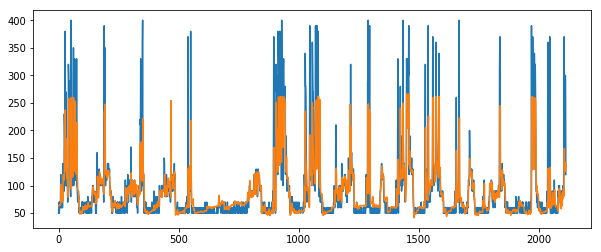

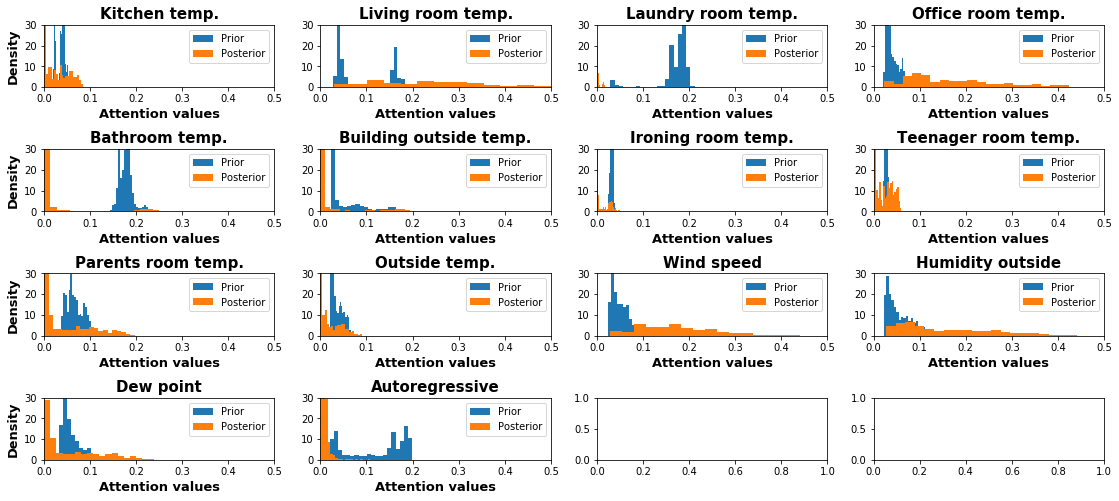

In [33]:
# ENERGY : MV-LSTM attention PLOT

fig, ax = plt.subplots(figsize=(10,4))
y = py_df['truth']
py = py_df['pred']
ax.plot(range(len(y)), y)
ax.plot(range(len(y)), py)


fig_row = 4
fig_col = 4
fig, ax = plt.subplots(fig_row, fig_col, figsize=(19,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
num_bins = 20

for i in range(num_vari):
    
    tmp_set = [j[i] for j in indi_prior]    
    
    ax[i/fig_col][i%fig_col].hist(tmp_set, num_bins, density = True, label = 'Prior')
    ax[i/fig_col][i%fig_col].set_xlim(0, 0.5)
    ax[i/fig_col][i%fig_col].set_ylim(0, 20)
    ax[i/fig_col][i%fig_col].set_title( vari_name[i], fontweight = 'bold', fontsize=15)
    
    tmp_set = [j[i] for j in indi_poster]  
    
    ax[i/fig_col][i%fig_col].hist(tmp_set, num_bins, density = True, label = 'Posterior')
    ax[i/fig_col][i%fig_col].set_xlim(0, 0.5)
    ax[i/fig_col][i%fig_col].set_ylim(0, 30)
    ax[i/fig_col][i%fig_col].set_title( vari_name[i], fontweight = 'bold', fontsize=15)
    
    ax[i/fig_col][i%fig_col].legend(fontsize=10)
    
    
    ax[i/fig_col][i%fig_col].set_xlabel('Attention values', fontweight = 'bold', fontsize = 13)
    if i%fig_col == 0:
        ax[i/fig_col][i%fig_col].set_ylabel('Density', fontweight = 'bold', fontsize = 13)
    
    
fig.savefig('../../ts_results/figure/energy_mv_poster.eps', bbox_inches='tight')


(2113, 13) Index([u'0', u'1', u'2', u'3', u'4', u'5', u'6', u'7', u'8', u'9', u'10',
       u'11', u'12'],
      dtype='object')

 --- individual prior mean and variance:
[('Office room temp.', 0.047638603), ('Dew point', 0.04870259), ('Kitchen temp.', 0.051242556), ('Ironing room temp.', 0.052104883), ('Outside temp.', 0.054710105), ('Teenager room temp.', 0.058271207), ('Building outside temp.', 0.059549525), ('Bathroom temp.', 0.060073536), ('Laundry room temp.', 0.061090097), ('Parents room temp.', 0.072935596), ('Living room temp.', 0.098939046), ('Wind speed', 0.16413227), ('Humidity outside', 0.17060995)]

 --- aggregated prior :
[('Office room temp.', 0.04763860549506725), ('Dew point', 0.04870258956075367), ('Kitchen temp.', 0.05124255550523489), ('Ironing room temp.', 0.052104884488372916), ('Outside temp.', 0.05471010731068593), ('Teenager room temp.', 0.05827120752768439), ('Building outside temp.', 0.059549528467604904), ('Bathroom temp.', 0.06007353173333433), ('Laundry r

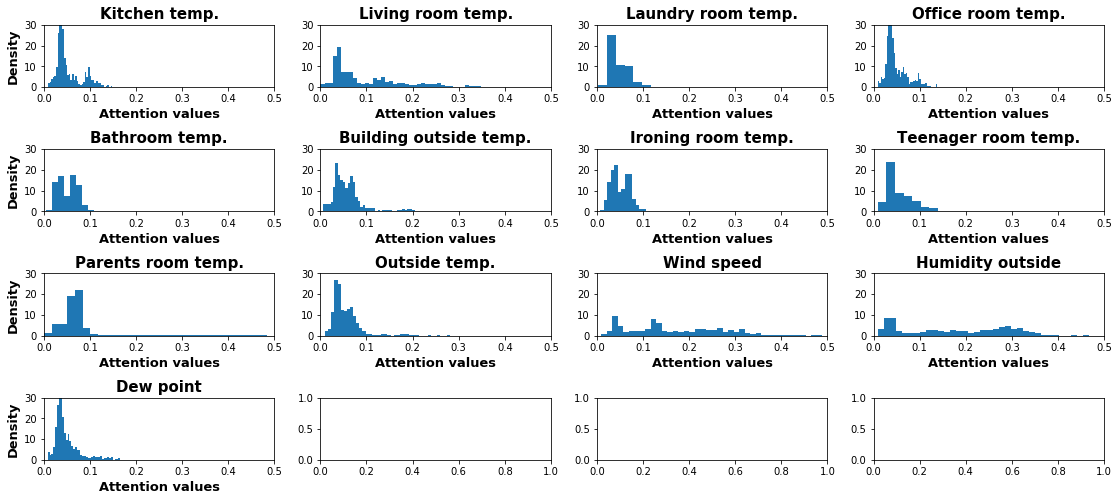

In [34]:
# Energy Dual
num_vari = 13

# -- Data -- 
pkl_file = "../../ts_results/pickle/new_energy_dual.pickle"
pkl_file = open(pkl_file, 'rb')
data = pickle.load(pkl_file)

att = data['attention']
rmse = data['rmse']

# attention
cols_att = [str(i) for i in range(num_vari)]
py_df = pd.DataFrame( att, columns = cols_att)
print py_df.shape, py_df.columns

indi_prior = prior(py_df, num_vari, vari_name)
aggre_prior = aggregate_prior(py_df, num_vari, vari_name)

# PLOT

fig_row = 4
fig_col = 4
fig, ax = plt.subplots(fig_row, fig_col, figsize=(19,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1.0)
num_bins = 40

for i in range(num_vari):
    
    tmp_set = [j[i] for j in indi_prior]    
    
    ax[i/fig_col][i%fig_col].hist(tmp_set, num_bins, density = True)
    ax[i/fig_col][i%fig_col].set_xlim(0, 0.5)
    ax[i/fig_col][i%fig_col].set_ylim(0, 30)
    ax[i/fig_col][i%fig_col].set_title( vari_name[i], fontweight = 'bold', fontsize=15)
    
    ax[i/fig_col][i%fig_col].set_xlabel('Attention values', fontweight = 'bold', fontsize = 13)
    if i%fig_col == 0:
        ax[i/fig_col][i%fig_col].set_ylabel('Density', fontweight = 'bold', fontsize = 13)
    
    
fig.savefig('../../ts_results/figure/energy_dual_prior.eps', bbox_inches='tight')
    

(2113, 14) Index([u'0', u'1', u'2', u'3', u'4', u'5', u'6', u'7', u'8', u'9', u'10',
       u'11', u'12', u'13'],
      dtype='object')

 --- individual prior mean and variance:
[('Humidity outside', -0.9815678), ('Wind speed', 0.3776926), ('Kitchen temp.', 0.6136367), ('Teenager room temp.', 0.73354435), ('Dew point', 0.7601752), ('Office room temp.', 0.7868733), ('Living room temp.', 1.083112), ('Laundry room temp.', 1.1307609), ('Bathroom temp.', 1.1494915), ('Ironing room temp.', 1.1794742), ('Outside temp.', 1.4293828), ('Parents room temp.', 1.4364121), ('Autoregressive', 1.5544968), ('Building outside temp.', 1.7016273)]

 --- aggregated prior :
[('Humidity outside', -0.0757668332659129), ('Wind speed', 0.029153945399170253), ('Kitchen temp.', 0.04736637283462158), ('Teenager room temp.', 0.056621998301292074), ('Dew point', 0.05867762813220527), ('Office room temp.', 0.06073843832571361), ('Living room temp.', 0.08360498910719343), ('Laundry room temp.', 0.08728299292510096), (

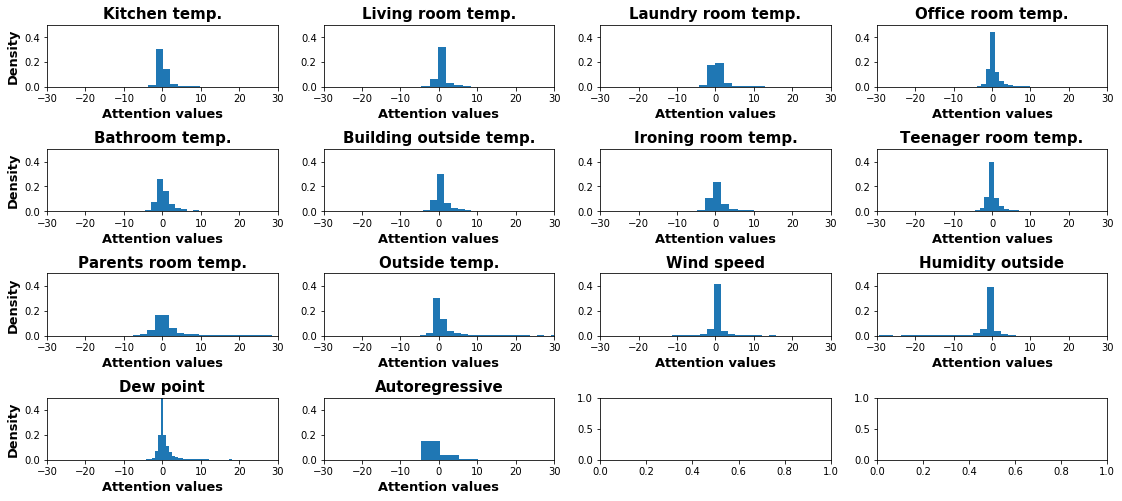

In [35]:
# Energy RETAIN
num_vari = 14

# -- Data -- 
pkl_file = "../../ts_results/pickle/new_energy_retain.pickle"
pkl_file = open(pkl_file, 'rb')
data = pickle.load(pkl_file)

att = data['attention']
rmse = data['rmse']

# attention
cols_att = [str(i) for i in range(num_vari)]
py_df = pd.DataFrame( att, columns = cols_att)
print py_df.shape, py_df.columns

indi_prior = prior(py_df, num_vari, vari_name)
aggre_prior = aggregate_prior(py_df, num_vari, vari_name)

# PLOT

fig_row = 4
fig_col = 4
fig, ax = plt.subplots(fig_row, fig_col, figsize=(19,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1.0)
num_bins = 40

for i in range(num_vari):
    
    tmp_set = [j[i] for j in indi_prior]    
    
    ax[i/fig_col][i%fig_col].hist(tmp_set, num_bins, density = True)
    ax[i/fig_col][i%fig_col].set_xlim(-30, +30)
    ax[i/fig_col][i%fig_col].set_ylim(0, 0.5)
    ax[i/fig_col][i%fig_col].set_title( vari_name[i], fontweight = 'bold', fontsize=15)

    ax[i/fig_col][i%fig_col].set_xlabel('Attention values', fontweight = 'bold', fontsize = 13)
    if i%fig_col == 0:
        ax[i/fig_col][i%fig_col].set_ylabel('Density', fontweight = 'bold', fontsize = 13)
        
        
fig.savefig('../../ts_results/figure/energy_retain_prior.eps', bbox_inches='tight')


In [50]:
# Energy CLSTM

num_vari = 14
att = [0.00065426715,0.24656369,0.24522345,0.3105692,0.0012374262,0.0010162243, \
       0.20501702,0.00055996,0.23354694,0.0009653159,0.0006030825,0.42291844,0.23047432,0.0012153077,]

for i in range(num_vari):
    if att[i] < 1e-2:
        att[i] = 0.0

print sorted( list(zip(vari_name, att)), key = lambda x: x[1] )


[('Kitchen temp.', 0.0), ('Bathroom temp.', 0.0), ('Building outside temp.', 0.0), ('Teenager room temp.', 0.0), ('Outside temp.', 0.0), ('Wind speed', 0.0), ('auto-reg', 0.0), ('Ironing room temp.', 0.20501702), ('Dew point', 0.23047432), ('Parents room temp.', 0.23354694), ('Laundry room temp.', 0.24522345), ('Living room temp.', 0.24656369), ('Office room temp.', 0.3105692), ('Humidity outside', 0.42291844)]


---- PM2.5

In [56]:
# PM25 : MV-LSTM attention

# ganger causal: 0,1,2 'Dew Point', 'Temperature', 'Pressure',
num_vari = 7
vari_name = ['Dew Point', 'Temperature', 'Pressure', 'Cumulated wind speed', \
             'Cumulated hours of snow','Cumulated hours of rain', 'Autoregressive']

# pm25_0.80.001_24
# pm25_0.80.001_23

py_ts = np.load("../../ts_results/pm25/pm25_0.80.001_23.dat")
print np.shape(py_ts)

# attention, individual prediction
cols_att = [str(i) for i in range(num_vari)]
cols_pred = ['pre' + str(i) for i in range(num_vari)]
cols = ['truth', 'pred'] + [str(i) for i in range(num_vari)] + ['pre' + str(i) for i in range(num_vari)]

py_df = pd.DataFrame( py_ts, columns = cols)
print py_df.shape

#  -----

indi_prior = prior(py_df, num_vari, vari_name)

indi_poster = individual_posterior(py_df, num_vari, vari_name)

aggre_prior = aggregate_prior(py_df, num_vari, vari_name)

aggregate_poster(indi_poster, num_vari, vari_name)

posterior(py_df, num_vari, vari_name, aggre_prior)    

(3359, 16)
(3359, 16)

 --- individual prior mean and variance:
[('Cumulated hours of rain', 0.06844748924706762), ('Temperature', 0.08875958983162288), ('Autoregressive', 0.0899491243543512), ('Pressure', 0.09840988413155984), ('Cumulated hours of snow', 0.12213948607415928), ('Dew Point', 0.260110417837302), ('Cumulated wind speed', 0.27218400957808675)]

 --- individual_posterior mean and variance :
[('Cumulated hours of rain', 0.03683190046498204), ('Cumulated hours of snow', 0.04411755610168274), ('Autoregressive', 0.04736093228386701), ('Temperature', 0.06665726870833054), ('Pressure', 0.07298955611955542), ('Cumulated wind speed', 0.34990797567224274), ('Dew Point', 0.3821348106493395)]

 --- aggregated prior :
[('Cumulated hours of rain', 0.06844748897114032), ('Temperature', 0.0887595894738129), ('Autoregressive', 0.08994912399174594), ('Pressure', 0.09840988373484734), ('Cumulated hours of snow', 0.12213948558178739), ('Dew Point', 0.2601104167887381), ('Cumulated wind speed'

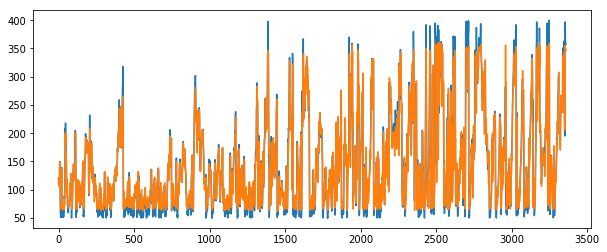

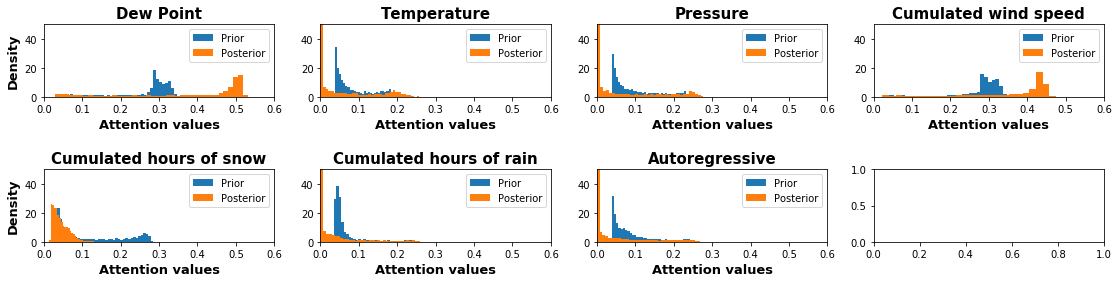

In [57]:
# PM25 : MV-LSTM attention PLOT

fig, ax = plt.subplots(figsize=(10,4))
y = py_df['truth']
py = py_df['pred']
ax.plot(range(len(y)), y)
ax.plot(range(len(y)), py)


fig_row = 2
fig_col = 4
fig, ax = plt.subplots(fig_row, fig_col, figsize=(19,4))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1.0)
num_bins = 40

for i in range(num_vari):
    
    tmp_set = [j[i] for j in indi_prior]    
    
    ax[i/fig_col][i%fig_col].hist(tmp_set, num_bins, density = True, label = 'Prior')
    ax[i/fig_col][i%fig_col].set_xlim(0, 0.6)
    ax[i/fig_col][i%fig_col].set_ylim(0, 50)
    ax[i/fig_col][i%fig_col].set_title( vari_name[i], fontweight = 'bold', fontsize=15)

    tmp_set = [j[i] for j in indi_poster]  
    
    ax[i/fig_col][i%fig_col].hist(tmp_set, num_bins, density = True, label = 'Posterior')
    ax[i/fig_col][i%fig_col].set_xlim(0, 0.6)
    ax[i/fig_col][i%fig_col].set_ylim(0, 50)
    ax[i/fig_col][i%fig_col].set_title( vari_name[i], fontweight = 'bold', fontsize=15)
    
    ax[i/fig_col][i%fig_col].set_xlabel('Attention values', fontweight = 'bold', fontsize = 13)
    if i%fig_col == 0:
        ax[i/fig_col][i%fig_col].set_ylabel('Density', fontweight = 'bold', fontsize = 13)
    
    
    ax[i/fig_col][i%fig_col].legend(fontsize=10)
    
fig.savefig('../../ts_results/figure/pm_mv_poster.eps', bbox_inches='tight')


(3359, 6) Index([u'0', u'1', u'2', u'3', u'4', u'5'], dtype='object')

 --- individual prior mean and variance:
[('Cumulated hours of rain', 0.069388136), ('Cumulated hours of snow', 0.07606715), ('Cumulated wind speed', 0.090543754), ('Pressure', 0.20735197), ('Dew Point', 0.2589453), ('Temperature', 0.2977037)]

 --- aggregated prior :
[('Cumulated hours of rain', 0.06938813076288199), ('Cumulated hours of snow', 0.07606714932778025), ('Cumulated wind speed', 0.09054374979238909), ('Pressure', 0.20735196997676467), ('Dew Point', 0.2589452679577004), ('Temperature', 0.29770372920540705)]


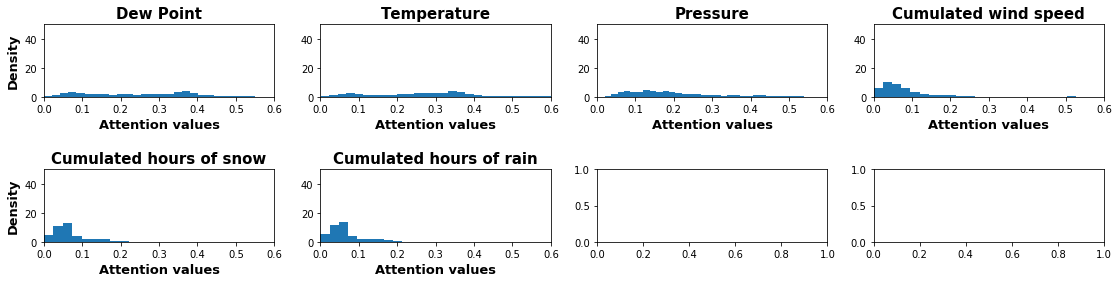

In [38]:
# PM2.5 Dual

num_vari = 6

# -- Data -- 
pkl_file = "../../ts_results/pickle/new_pm25_dual.pickle"
pkl_file = open(pkl_file, 'rb')
data = pickle.load(pkl_file)

att = data['attention']
rmse = data['rmse']

# attention
cols_att = [str(i) for i in range(num_vari)]
py_df = pd.DataFrame( att, columns = cols_att)
print py_df.shape, py_df.columns

indi_prior = prior(py_df, num_vari, vari_name)
aggre_prior = aggregate_prior(py_df, num_vari, vari_name)


# PLOT

fig_row = 2
fig_col = 4
fig, ax = plt.subplots(fig_row, fig_col, figsize=(19,4))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1.0)
num_bins = 40

for i in range(num_vari):
    
    tmp_set = [j[i] for j in indi_prior]    
    
    ax[i/fig_col][i%fig_col].hist(tmp_set, num_bins, density = True)
    ax[i/fig_col][i%fig_col].set_xlim(0, 0.6)
    ax[i/fig_col][i%fig_col].set_ylim(0, 50)
    ax[i/fig_col][i%fig_col].set_title( vari_name[i], fontweight = 'bold', fontsize=15)
    
    ax[i/fig_col][i%fig_col].set_xlabel('Attention values', fontweight = 'bold', fontsize = 13)
    if i%fig_col == 0:
        ax[i/fig_col][i%fig_col].set_ylabel('Density', fontweight = 'bold', fontsize = 13)
    
    
fig.savefig('../../ts_results/figure/pm_dual_prior.eps', bbox_inches='tight')


(3359, 7)
(3359, 7) Index([u'0', u'1', u'2', u'3', u'4', u'5', u'6'], dtype='object')

 --- individual prior mean and variance:
[('Temperature', -1.2909514), ('Dew Point', -0.88860077), ('Cumulated hours of rain', -0.33812034), ('Cumulated wind speed', -0.30479604), ('Cumulated hours of snow', 0.0031646611), ('Pressure', 0.81640524), ('Autoregressive', 2.7214887)]

 --- aggregated prior :
[('Temperature', -1.7965063998722164), ('Dew Point', -1.2365895446608564), ('Cumulated hours of rain', -0.4705330913800128), ('Cumulated wind speed', -0.424158575847893), ('Cumulated hours of snow', 0.00440397844504885), ('Pressure', 1.1361212427762486), ('Autoregressive', 3.7872623863967387)]


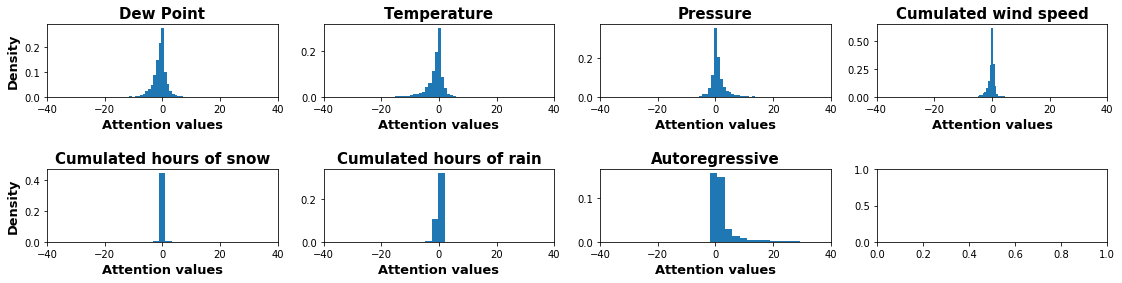

In [39]:
# PM2.5 RETAIN

num_vari = 7

# -- Data -- 
pkl_file = "../../ts_results/pickle/new_pm25_retain.pickle"
pkl_file = open(pkl_file, 'rb')
data = pickle.load(pkl_file)

att = data['attention']
rmse = data['rmse']

print np.shape(att)

# attention
cols_att = [str(i) for i in range(num_vari)]
py_df = pd.DataFrame( att, columns = cols_att)
print py_df.shape, py_df.columns

indi_prior = prior(py_df, num_vari, vari_name)
aggre_prior = aggregate_prior(py_df, num_vari, vari_name)

# PLOT

fig_row = 2
fig_col = 4
fig, ax = plt.subplots(fig_row, fig_col, figsize=(19,4))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1.0)
num_bins = 40

for i in range(num_vari):
    
    tmp_set = [j[i] for j in indi_prior]    
    
    ax[i/fig_col][i%fig_col].hist(tmp_set, num_bins, density = True)
    ax[i/fig_col][i%fig_col].set_xlim(-40, +40)
#     ax[i/fig_col][i%fig_col].set_ylim(0, 50)
    ax[i/fig_col][i%fig_col].set_title( vari_name[i], fontweight = 'bold', fontsize=15)
    
    ax[i/fig_col][i%fig_col].set_xlabel('Attention values', fontweight = 'bold', fontsize = 13)
    if i%fig_col == 0:
        ax[i/fig_col][i%fig_col].set_ylabel('Density', fontweight = 'bold', fontsize = 13)
    
    
fig.savefig('../../ts_results/figure/pm_retain_prior.eps', bbox_inches='tight')

In [6]:
# PM2.5 CLSTM

num_vari = 7
att  = [0.17374223,0.32961404,0.19906539,0.0005875013,0.0013681239,0.0009232172,0.0005405182]

for i in range(num_vari):
    if att[i] < 1e-2:
        att[i] = 0.0

print sorted( list(zip(vari_name, att)), key = lambda x: x[1] )
    
# 0.18104714,0.19856167,0.10827577,0.00035925463,0.0005451732,0.21557647,0.099544466,
# 0.12856844,0.20194638,0.14840071,0.00049849955,0.0005578786,0.0004996133,0.16396974,
# 0.0008651622,0.61560917,0.49236092,0.17443651,0.0009570704,0.08571515,0.39498904,
# 0.5059373,0.5770229,0.2992319,0.4754351,0.00099338,0.0015967741,0.42467982,

[('Cumulated wind speed', 0.0), ('Cumulated hours of snow', 0.0), ('Cumulated hours of rain', 0.0), ('auto-reg', 0.0), ('Dew Point', 0.17374223), ('Pressure', 0.19906539), ('Temperature', 0.32961404)]



 --- individual prior mean and variance:
[('Cumulated hours of rain', 0.069388136), ('Cumulated hours of snow', 0.07606715), ('Cumulated wind speed', 0.090543754), ('Pressure', 0.20735197), ('Dew Point', 0.2589453), ('Temperature', 0.2977037)]

 --- aggregated prior :
[('Cumulated hours of rain', 0.06938813076288199), ('Cumulated hours of snow', 0.07606714932778025), ('Cumulated wind speed', 0.09054374979238909), ('Pressure', 0.20735196997676467), ('Dew Point', 0.2589452679577004), ('Temperature', 0.29770372920540705)]

 --- individual prior mean and variance:
[('Temperature', -1.2909514), ('Dew Point', -0.88860077), ('Cumulated hours of rain', -0.33812034), ('Cumulated wind speed', -0.30479604), ('Cumulated hours of snow', 0.0031646611), ('Pressure', 0.81640524), ('Autoregressive', 2.7214887)]

 --- aggregated prior :
[('Temperature', -1.7965063998722164), ('Dew Point', -1.2365895446608564), ('Cumulated hours of rain', -0.4705330913800128), ('Cumulated wind speed', -0.424158575847893

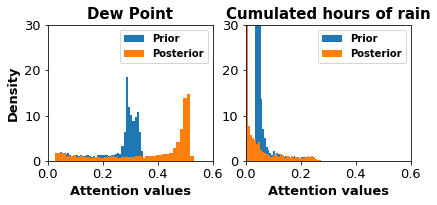

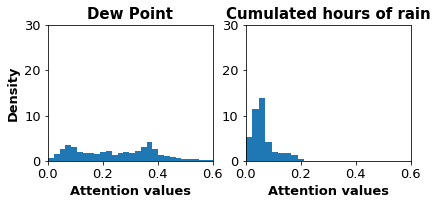

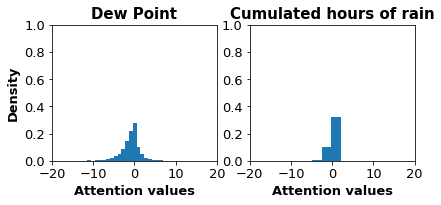

In [61]:
# Figure on the paper 

# -- Dual -- 

num_vari = 6

pkl_file = "../../ts_results/pickle/new_pm25_dual.pickle"
pkl_file = open(pkl_file, 'rb')
data = pickle.load(pkl_file)

att = data['attention']
rmse = data['rmse']

# attention
cols_att = [str(i) for i in range(num_vari)]
py_df = pd.DataFrame( att, columns = cols_att)

dual_indi_prior = prior(py_df, num_vari, vari_name)
dual_aggre_prior = aggregate_prior(py_df, num_vari, vari_name)


# -- RETAIN -- 

num_vari = 7

pkl_file = "../../ts_results/pickle/new_pm25_retain.pickle"
pkl_file = open(pkl_file, 'rb')
data = pickle.load(pkl_file)

att = data['attention']
rmse = data['rmse']

# attention
cols_att = [str(i) for i in range(num_vari)]
py_df = pd.DataFrame( att, columns = cols_att)

retain_indi_prior = prior(py_df, num_vari, vari_name)
retain_aggre_prior = aggregate_prior(py_df, num_vari, vari_name)


# -- plot ---

vari_plot = [0, 5]
# vari_name = ['Dew Point', 'Temperature', 'Pressure', 'Cumulated wind speed', \
#              'Cumulated hours of snow','Cumulated hours of rain', 'Autoregressive']


fig_row = 1
fig_col = 2
fig, ax = plt.subplots(fig_row, fig_col, figsize=(6.5,2.5))

for i in range(len(vari_plot)):
    
    tmp_set = [j[vari_plot[i]] for j in indi_prior]    
    
    ax[i].hist(tmp_set, 40, density = True, label = 'Prior')
    ax[i].set_xlim(0, 0.6)
    ax[i].set_ylim(0, 50)
    ax[i].set_title( vari_name[ vari_plot[i] ], fontweight = 'bold', fontsize=15)
    
    
    tmp_set = [j[vari_plot[i]] for j in indi_poster]  
    
    ax[i].hist(tmp_set, 40, density = True, label = 'Posterior')
    ax[i].set_xlim(0, 0.6)
    ax[i].set_ylim(0, 30)
    ax[i].set_title( vari_name[ vari_plot[i] ], fontweight = 'bold', fontsize=15)
    
    ax[i].set_xlabel('Attention values', fontweight = 'bold', fontsize = 13)
    
    if i == 0:
        ax[i].set_ylabel('Density', fontweight = 'bold', fontsize = 13)
    
    ax[i].legend(fontsize=13, prop = {'weight':'bold'})
    
    ax[i].tick_params(axis = 'both', which = 'major', labelsize = 13)
    
#     ax[i].set_xticklabels(xticklabels, fontsize=7)
    
#     plt.xticks(fontsize=13)
#     plt.yticks(fontsize=13)


fig.savefig('../../ts_results/figure/pm25_mv.eps', bbox_inches='tight')


fig, ax = plt.subplots(fig_row, fig_col, figsize=(6.5,2.5))
for i in range(len(vari_plot)):
    
    tmp_set = [j[vari_plot[i]] for j in dual_indi_prior]    
    
    ax[i].hist(tmp_set, 40, density = True, label = 'Prior')
    ax[i].set_xlim(0, 0.6)
    ax[i].set_ylim(0, 30)
    ax[i].set_title( vari_name[ vari_plot[i] ], fontweight = 'bold', fontsize=15)
    
    ax[i].set_xlabel('Attention values', fontweight = 'bold', fontsize = 13)
    if i == 0:
        ax[i].set_ylabel('Density', fontweight = 'bold', fontsize = 13)
    
#     ax[i].legend(fontsize=13)
    
    ax[i].tick_params(axis = 'both', which = 'major', labelsize = 13)
    
fig.savefig('../../ts_results/figure/pm25_dual.eps', bbox_inches='tight')



fig, ax = plt.subplots(fig_row, fig_col, figsize=(6.5,2.5))
for i in range(len(vari_plot)):
    
    tmp_set = [j[vari_plot[i]] for j in retain_indi_prior]    
    
    ax[i].hist(tmp_set, 40, density = True, label = 'Prior')
    ax[i].set_xlim(-20, +20)
    ax[i].set_ylim(0, 1)
    ax[i].set_title( vari_name[ vari_plot[i] ], fontweight = 'bold', fontsize=15)
    
    ax[i].set_xlabel('Attention values', fontweight = 'bold', fontsize = 13)
    if i == 0:
        ax[i].set_ylabel('Density', fontweight = 'bold', fontsize = 13)
    
#     ax[i].legend(fontsize=13)
    
    ax[i].tick_params(axis = 'both', which = 'major', labelsize = 13)
    
fig.savefig('../../ts_results/figure/pm25_retain.eps', bbox_inches='tight')


---- Synthetic

In [2]:
# Synthetic : MV-LSTM attention

# ganger causal:
num_vari = 11
vari_name = ['Variable 0', 'Variable 1', 'Variable 2', 'Variable 3', 'Variable 4', 'Variable 5',\
             'Variable 6', 'Variable 7', 'Variable 8', 'Variable 9', 'Autoregressive']

py_ts = np.load("../../ts_results/syn/syn_20.80.0001_50.dat")
print np.shape(py_ts)

# attention, individual prediction
cols_att = [str(i) for i in range(num_vari)]
cols_pred = ['pre' + str(i) for i in range(num_vari)]
cols = ['truth', 'pred'] + [str(i) for i in range(num_vari)] + ['pre' + str(i) for i in range(num_vari)]

py_df = pd.DataFrame( py_ts, columns = cols)
print py_df.shape

#  -----

indi_prior = prior(py_df, num_vari, vari_name)

indi_poster = individual_posterior(py_df, num_vari, vari_name)

aggre_prior = aggregate_prior(py_df, num_vari, vari_name)

aggregate_poster(indi_poster, num_vari, vari_name)

posterior(py_df, num_vari, vari_name, aggre_prior)    

(1990, 24)
(1990, 24)

 --- individual prior mean and variance:
[('Variable 0', 0.037895777985341286), ('Variable 7', 0.040280806149669626), ('Autoregressive', 0.04446289828000356), ('Variable 9', 0.05367007686957792), ('Variable 5', 0.08122596979777717), ('Variable 2', 0.08878995158321144), ('Variable 8', 0.10356371134762937), ('Variable 4', 0.118627121935051), ('Variable 1', 0.11901454139201335), ('Variable 6', 0.134481866328261), ('Variable 3', 0.17798727882848164)]

 --- individual_posterior mean and variance :
[('Variable 5', 0.000808054405000146), ('Autoregressive', 0.01343169257167677), ('Variable 9', 0.013885000874803356), ('Variable 0', 0.02101908652883565), ('Variable 7', 0.06363226877947283), ('Variable 1', 0.08299793851894503), ('Variable 4', 0.1262040027054069), ('Variable 6', 0.14717622723965704), ('Variable 8', 0.17095489400580519), ('Variable 2', 0.175337681663702), ('Variable 3', 0.18455315270669503)]

 --- aggregated prior :
[('Variable 0', 0.03789577777607538), ('Var

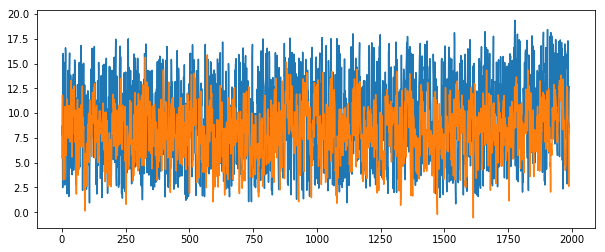

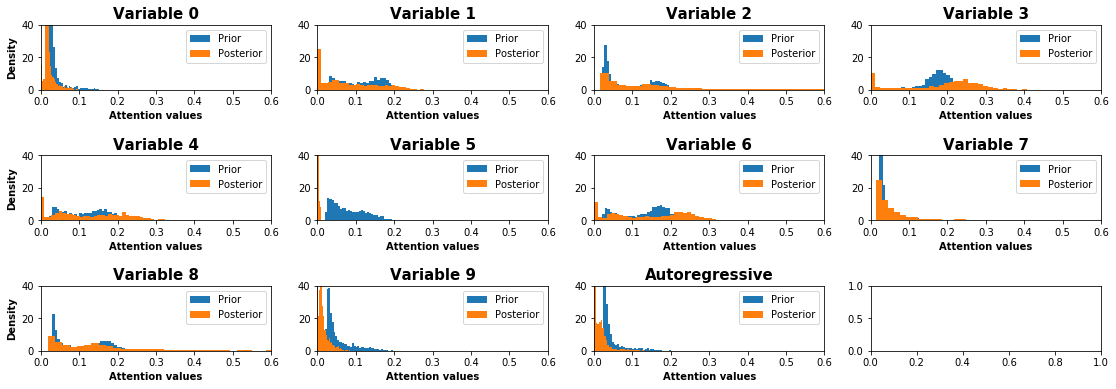

In [3]:
# Synthetic : MV-LSTM attention PLOT

fig, ax = plt.subplots(figsize=(10,4))
y = py_df['truth']
py = py_df['pred']
ax.plot(range(len(y)), y)
ax.plot(range(len(y)), py)


fig_row = 3
fig_col = 4
fig, ax = plt.subplots(fig_row, fig_col, figsize=(19,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1.0)
num_bins = 40

for i in range(num_vari):
    
    tmp_set = [j[i] for j in indi_prior]    
    
    ax[i/fig_col][i%fig_col].hist(tmp_set, num_bins, density = True, label = 'Prior')
    ax[i/fig_col][i%fig_col].set_xlim(0, 0.6)
    ax[i/fig_col][i%fig_col].set_ylim(0, 50)
    ax[i/fig_col][i%fig_col].set_title( vari_name[i], fontweight = 'bold', fontsize=15)

    tmp_set = [j[i] for j in indi_poster]  
    
    ax[i/fig_col][i%fig_col].hist(tmp_set, num_bins, density = True, label = 'Posterior')
    ax[i/fig_col][i%fig_col].set_xlim(0, 0.6)
    ax[i/fig_col][i%fig_col].set_ylim(0, 40)
    ax[i/fig_col][i%fig_col].set_title( vari_name[i], fontweight = 'bold', fontsize=15)
    
    ax[i/fig_col][i%fig_col].set_xlabel('Attention values', fontweight = 'bold', fontsize = 10)
    if i%fig_col == 0:
        ax[i/fig_col][i%fig_col].set_ylabel('Density', fontweight = 'bold', fontsize = 10)
    
    
    ax[i/fig_col][i%fig_col].legend(fontsize=10)
    
fig.savefig('../../ts_results/figure/syn_mv_poster.eps', bbox_inches='tight')


(1980, 10) Index([u'0', u'1', u'2', u'3', u'4', u'5', u'6', u'7', u'8', u'9'], dtype='object')

 --- individual prior mean and variance:
[('Variable 9', 0.09453827), ('Variable 5', 0.09621238), ('Variable 8', 0.09683129), ('Variable 4', 0.09700478), ('Variable 2', 0.09916734), ('Variable 6', 0.10046052), ('Variable 3', 0.10296296), ('Variable 7', 0.10360363), ('Variable 0', 0.10453807), ('Variable 1', 0.104680754)]

 --- aggregated prior :
[('Variable 9', 0.09453827038179365), ('Variable 5', 0.09621238045496047), ('Variable 8', 0.09683128500315608), ('Variable 4', 0.0970047741833249), ('Variable 2', 0.09916734004557845), ('Variable 6', 0.10046052484458504), ('Variable 3', 0.10296295546403118), ('Variable 7', 0.10360363631906257), ('Variable 0', 0.10453807412747254), ('Variable 1', 0.1046807541255301)]


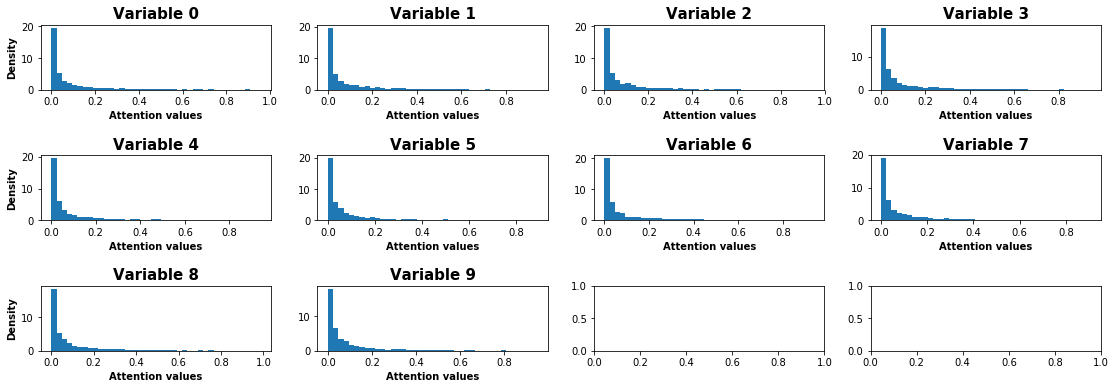

In [4]:
# Syn Dual
num_vari = 10

# -- Data -- 
pkl_file = "../../ts_results/pickle/new_syn_dual.pickle"
pkl_file = open(pkl_file, 'rb')
data = pickle.load(pkl_file)

att = data['attention']
rmse = data['rmse']

# attention
cols_att = [str(i) for i in range(num_vari)]
py_df = pd.DataFrame( att, columns = cols_att)
print py_df.shape, py_df.columns

indi_prior = prior(py_df, num_vari, vari_name)
aggre_prior = aggregate_prior(py_df, num_vari, vari_name)


# # PLOT

fig_row = 3
fig_col = 4
fig, ax = plt.subplots(fig_row, fig_col, figsize=(19,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1.0)
num_bins = 40

for i in range(num_vari):
    
    tmp_set = [j[i] for j in indi_prior]    
    
    ax[i/fig_col][i%fig_col].hist(tmp_set, num_bins, density = True)
#     ax[i/fig_col][i%fig_col].set_xlim(-40, +40)
#     ax[i/fig_col][i%fig_col].set_ylim(0, 50)
    ax[i/fig_col][i%fig_col].set_title( vari_name[i], fontweight = 'bold', fontsize=15)
    
    
    ax[i/fig_col][i%fig_col].set_xlabel('Attention values', fontweight = 'bold', fontsize = 10)
    if i%fig_col == 0:
        ax[i/fig_col][i%fig_col].set_ylabel('Density', fontweight = 'bold', fontsize = 10)
    
    
    
fig.savefig('../../ts_results/figure/syn_dual_prior.eps', bbox_inches='tight')


(1980, 11) Index([u'0', u'1', u'2', u'3', u'4', u'5', u'6', u'7', u'8', u'9', u'10'], dtype='object')

 --- individual prior mean and variance:
[('Variable 3', -0.009640744), ('Variable 5', -0.008184851), ('Variable 0', -0.007422657), ('Variable 7', -0.0031853453), ('Variable 1', 0.000397652), ('Variable 2', 0.0016473299), ('Variable 6', 0.00360309), ('Variable 4', 0.0043956283), ('Variable 9', 0.0055139004), ('Variable 8', 0.006594178), ('Autoregressive', 0.080791205)]

 --- aggregated prior :
[('Variable 3', -0.1293896751068265), ('Variable 5', -0.10984992885001142), ('Variable 0', -0.09962043866843097), ('Variable 7', -0.0427509413782467), ('Variable 1', 0.005336938090045324), ('Variable 2', 0.022109029606314418), ('Variable 6', 0.048357540846879286), ('Variable 4', 0.058994292199283475), ('Variable 9', 0.07400276335258096), ('Variable 8', 0.08850130325906307), ('Autoregressive', 1.0843090488658742)]


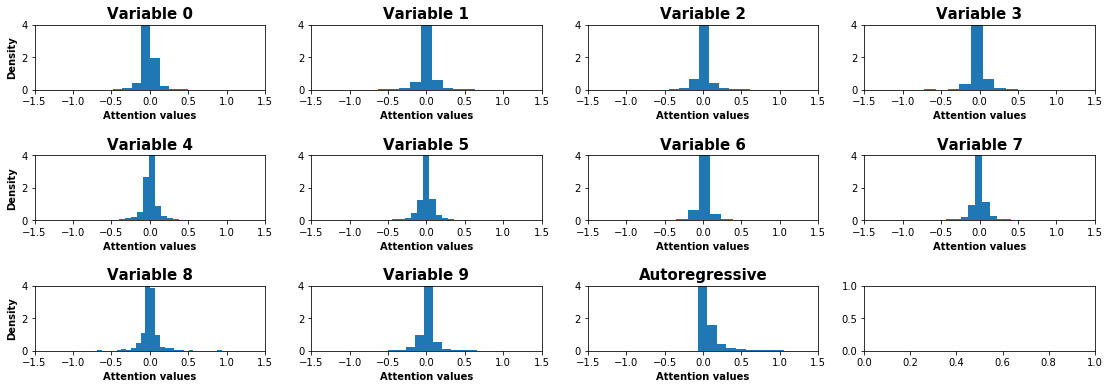

In [5]:
# Syn RETAIN
num_vari = 11

# -- Data -- 
pkl_file = "../../ts_results/pickle/new_syn_retain.pickle"
pkl_file = open(pkl_file, 'rb')
data = pickle.load(pkl_file)

att = data['attention']
rmse = data['rmse']

# attention
cols_att = [str(i) for i in range(num_vari)]
py_df = pd.DataFrame( att, columns = cols_att)
print py_df.shape, py_df.columns

indi_prior = prior(py_df, num_vari, vari_name)
aggre_prior = aggregate_prior(py_df, num_vari, vari_name)

# PLOT

fig_row = 3
fig_col = 4
fig, ax = plt.subplots(fig_row, fig_col, figsize=(19,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1.0)
num_bins = 40

for i in range(num_vari):
    
    tmp_set = [j[i] for j in indi_prior]    
    
    ax[i/fig_col][i%fig_col].hist(tmp_set, num_bins, density = True)
    ax[i/fig_col][i%fig_col].set_xlim(-1.5, +1.5)
    ax[i/fig_col][i%fig_col].set_ylim(0, 4)
    ax[i/fig_col][i%fig_col].set_title( vari_name[i], fontweight = 'bold', fontsize=15)
    
    ax[i/fig_col][i%fig_col].set_xlabel('Attention values', fontweight = 'bold', fontsize = 10)
    if i%fig_col == 0:
        ax[i/fig_col][i%fig_col].set_ylabel('Density', fontweight = 'bold', fontsize = 10)
    
fig.savefig('../../ts_results/figure/syn_retain_prior.eps', bbox_inches='tight')


In [47]:
# Syn CLSTM

num_vari = 11
att  = [0.017384348,0.015318627,0.0020814168,0.016327035,0.001999297,\
        0.0007926918,0.028057877,0.033312295,0.0014352764,0.0028742272,0.0011287373,]

for i in range(num_vari):
    if att[i] < 1e-2:
        att[i] = 0.0

print sorted( list(zip(vari_name, att)), key = lambda x: x[1] )
    

# 0.017384348,0.015318627,0.0020814168,0.016327035,0.001999297,0.0007926918,0.028057877,
# 0.033312295,0.0014352764,0.0028742272,0.0011287373,
# 0.034125995,0.03905484,0.004116321,0.003618446,0.00037414575,0.011026631,0.0015225211,
# 0.022412602,0.0012032305,0.004303212,0.0014143531,
# 0.024061363,0.04483077,0.017694289,0.034894455,0.03199277,0.03735357,0.004959991,
# 0.0027846333,0.046585303,0.00012236439,0.00045463134,
# 0.024061363,0.04483077,0.017694289,0.034894455,0.03199277,0.03735357,0.004959991,
# 0.0027846333,0.046585303,0.00012236439,0.00045463134,
# 0.01835544,0.018684996,0.03345456,0.039232746,0.021629145,0.0036108084,
# 0.021197185,0.020186739,0.0065486636,0.0009946949,0.0017170088,

[('2', 0.0), ('4', 0.0), ('5', 0.0), ('8', 0.0), ('9', 0.0), ('10', 0.0), ('1', 0.015318627), ('3', 0.016327035), ('0', 0.017384348), ('6', 0.028057877), ('7', 0.033312295)]


# ---- statistical analysis ----


In [ ]:
# ---- statistical analysis ----



# load data for statistical analysis

# feature_cols = ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']

# DEWP: Dew Point (â„ƒ) 
# TEMP: Temperature (â„ƒ) 
# PRES: Pressure (hPa) 
# cbwd: Combined wind direction 
# Iws: Cumulated wind speed (m/s) 
# Is: Cumulated hours of snow 
# Ir: Cumulated hours of rain 

# the last column is the targe variable 
dataset_str = 'pm25'
xtr = np.load(file_dic_statis[dataset_str][0])
xts = np.load(file_dic_statis[dataset_str][1])
print np.shape(xtr), np.shape(xts)


# stationarize time series 
sta_dta = multi_ts_stationarize( np.asarray(xtr) )
print np.shape(sta_dta)

# variable dependency
max_order = 200
VAR_res,lag = causality_VAR(sta_dta, max_order)
            
print causality_one(VAR_res, sta_dta, 6)

#print causality_pairwise(VAR_res, post_ts)

In [8]:
# load data for statistical analysis

# feature_cols = [ 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9' , 'T_out', 'Windspeed', 'RH_out', \
# 'Tdewpoint' 


# -- target series
# Appliances, energy use in Wh 
# lights, energy use of light fixtures in the house in Wh 

# -- exgoneous series 
# T1, Temperature in kitchen area, in Celsius 
# T2, Temperature in living room area, in Celsius 
# T3, Temperature in laundry room area 
# T4, Temperature in office room, in Celsius 
# T5, Temperature in bathroom, in Celsius 
# T6, Temperature outside the building (north side), in Celsius 
# T7, Temperature in ironing room , in Celsius 
# T8, Temperature in teenager room 2, in Celsius 
# T9, Temperature in parents room, in Celsius 
# To, Temperature outside (from Chievres weather station), in Celsius 
# Pressure (from Chievres weather station), in mm Hg 
# RH_out, Humidity outside (from Chievres weather station), in % 
# Wind speed (from Chievres weather station), in m/s 
# Visibility (from Chievres weather station), in km 
# Tdewpoint (from Chievres weather station), Â°C 


# the last column is the targe variable 
dataset_str = 'energy'
xtr = np.load(file_dic_statis[dataset_str][0])
xts = np.load(file_dic_statis[dataset_str][1])
print np.shape(xtr), np.shape(xts)

# stationarize time series 
sta_dta = multi_ts_stationarize( np.asarray(xtr) )
print np.shape(sta_dta)

# variable dependency
max_order = 200
VAR_res,lag = causality_VAR(sta_dta, max_order)
            
print causality_one(VAR_res, sta_dta, 13)

#print causality_pairwise(VAR_res, post_ts)

(8200, 14) (2200, 14)
stationary prepro:  0 1.53873681466e-08 

stationary prepro:  0 2.67332352376e-10 

stationary prepro:  0 6.22084629443e-06 

stationary prepro:  0 7.65852979756e-08 

stationary prepro:  0 4.56317841218e-09 

stationary prepro:  0 3.12028393606e-05 

stationary prepro:  0 0.00215212148204 

stationary prepro:  0 0.000159225901517 

stationary prepro:  1 0.0 

stationary prepro:  0 8.14779094622e-05 

stationary prepro:  0 8.95657918297e-07 

stationary prepro:  0 9.36092515117e-17 

stationary prepro:  0 0.00688669851617 

stationary prepro:  0 4.24157747612e-26 

(8199, 14)
best lag:  {'fpe': 26, 'hqic': 14, 'bic': 8, 'aic': 26}
[1, 8]


In [9]:
# load data for statistical analysis

# feature_cols = ['p-temperature', 'cloudcover', 'dewpoint', 'humidity', 'temperature', 'windbearing', 'windspeed']


# the last column is the targe variable 
dataset_str = 'plant'
xtr = np.load(file_dic_statis[dataset_str][0])
xts = np.load(file_dic_statis[dataset_str][1])
print np.shape(xtr), np.shape(xts)

# stationarize time series 
sta_dta = multi_ts_stationarize( np.asarray(xtr) )
print np.shape(sta_dta)

# variable dependency
max_order = 200
VAR_res,lag = causality_VAR(sta_dta, max_order)
            
print causality_one(VAR_res, sta_dta, 7)

#print causality_pairwise(VAR_res, post_ts)

(5400, 8) (1554, 8)
stationary prepro:  1 3.89605902543e-30 

stationary prepro:  0 5.8135957626e-09 

stationary prepro:  0 0.00897549257369 

stationary prepro:  0 5.50436184832e-05 

stationary prepro:  1 0.0 

stationary prepro:  0 9.23194064666e-19 

stationary prepro:  0 2.9333505289e-20 

stationary prepro:  0 8.96960810192e-09 

(5399, 8)
best lag:  {'fpe': 39, 'hqic': 20, 'bic': 19, 'aic': 39}
[0, 1, 2, 4]


In [ ]:
# statisical test 
trans_dta = np.transpose(xtr, [1,0])
for i in range(np.shape(xtr)[1]):
    print '--', i, stationary_test( trans_dta[i] )

In [ ]:
# temporal dependency

temporal_detect_individual(6, xtr, 200)

# auto-correlation, partial auto-correlation, cross correlation 
